## Biliotecas

In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from scipy.stats import spearmanr
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Carregando dados

In [20]:
dados_processados = r"dados_processados/"

# Carregar os datasets
df = pd.read_csv(f"{dados_processados}dados_merged.csv")
pd.set_option('display.max_columns', None)

In [21]:
df.head()

,ID_Empregado,Idade,Genero,Cargo,Industria,Anos_Experiencia,Local_Trabalho,Horas_Trabalhadas_Semana,Numero_Reunioes_Virtuais,Avaliacao_Equilibrio_Vida,Nivel_Estresse,Condicao_Saude_Mental,Acesso_Recursos_Saude_Mental,Mudanca_Produtividade,Avaliacao_Isolamento_Social,Satisfacao_Trabalho_Remoto,Suporte_Empresa_Trabalho_Remoto,Atividade_Fisica,Qualidade_Sono,Regiao,Nome_Programa,Status_Participacao,Pontuacao_Feedback,Melhoria_Observada,Cargo_Anterior,Novo_Cargo,Mudanca_Salarial,Satisfacao_Cargo
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,Work-Life Balance Workshop,Participou,3,No,Senior Developer,Project Manager,2991.948819,2.909449
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,Work-Life Balance Workshop,Participou,3,No,Senior Developer,Project Manager,2991.948819,2.909449
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,Weekly,Poor,North America,Work-Life Balance Workshop,Participou,3,No,Senior Developer,Project Manager,2991.948819,2.909449
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,Weekly,Poor,Europe,Mindfulness Meditation,Não Participou,2,Yes,Senior Developer,Project Manager,2991.948819,2.909449
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,Anxiety,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,Fitness Challenge,Participou,4,No,Junior Developer,Senior Developer,2659.000000,1.000000


## Modelagem Preditiva

##### Com base nas características demográficas, local de trabalho (remoto, híbrido, presencial) e feedback dos programas de bem-estar, pode-se prever o nível de estresse auto-relatado de um empregado?

In [3]:
df_nivel_estresse = df[["Regiao", "Local_Trabalho", "Pontuacao_Feedback", "Nivel_Estresse"]]

In [4]:
# Codificando variáveis categóricas
le1 = LabelEncoder()
df_nivel_estresse['Regiao'] = le1.fit_transform(df_nivel_estresse['Regiao']).astype('int')

le2 = LabelEncoder()
df_nivel_estresse['Local_Trabalho'] = le2.fit_transform(df_nivel_estresse['Local_Trabalho']).astype('int')

le3 = LabelEncoder()
df_nivel_estresse['Nivel_Estresse'] = le3.fit_transform(df_nivel_estresse['Nivel_Estresse']).astype('int')

In [5]:
print(le1.classes_)
print(le2.classes_)
print(le3.classes_)

['Africa' 'Asia' 'Europe' 'North America' 'Oceania' 'South America']
['Hybrid' 'Onsite' 'Remote']
['High' 'Low' 'Medium']


In [6]:
# Separando as variáveis independentes (X) e dependente (y)
X = df_nivel_estresse[['Regiao', 'Local_Trabalho', 'Pontuacao_Feedback']]
y = df_nivel_estresse['Nivel_Estresse']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predizendo o nível de estresse no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.39      0.37       356
           1       0.32      0.23      0.27       321
           2       0.34      0.37      0.36       347

    accuracy                           0.34      1024
   macro avg       0.34      0.33      0.33      1024
weighted avg       0.34      0.34      0.33      1024



Somente essas variáveis são suficientes para fazer um predição do nível de estresse confiável, o resultado é bem baixo. Além disso, logo baixo é possível ver a baixa correlação entre o nível de estresse com a Região, Pontuação do FeedBack e Local de Trabalho.

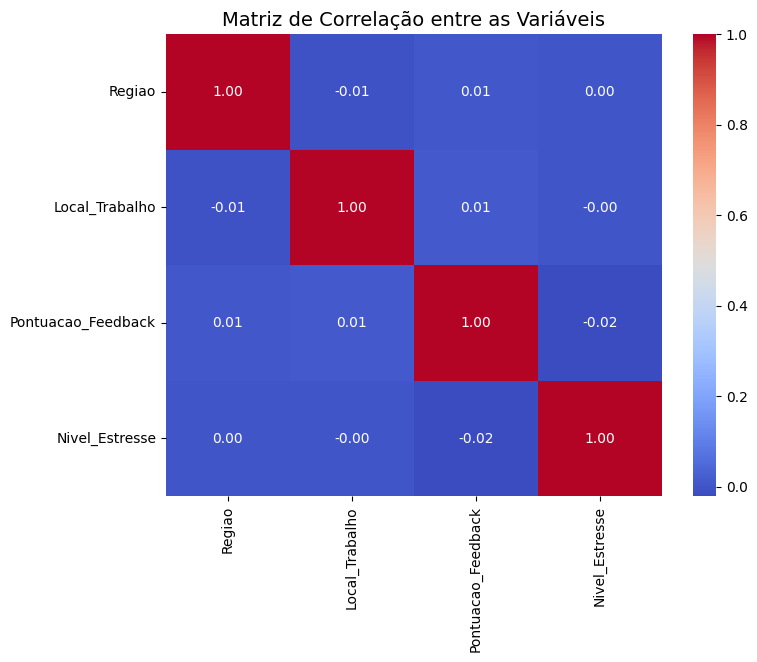

In [7]:
# Analisando a correlação entre as variáveis
correlation_matrix = df_nivel_estresse[['Regiao', 'Local_Trabalho', 'Pontuacao_Feedback', 'Nivel_Estresse']].corr()

# Plotando a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlação entre as Variáveis', fontsize=14)
plt.show()

##### Existe uma correlação entre a participação em programas de bem-estar e a satisfação geral com o trabalho remoto? Um modelo preditivo pode identificar quais aspectos dos programas de bem-estar são mais eficazes em aumentar a satisfação no trabalho?

In [10]:
df_bem_estar_satisfacao = df[["Status_Participacao", "Satisfacao_Trabalho_Remoto", "Acesso_Recursos_Saude_Mental", "Atividade_Fisica", "Qualidade_Sono"]]
df_bem_estar_satisfacao.head()

,Status_Participacao,Satisfacao_Trabalho_Remoto,Acesso_Recursos_Saude_Mental,Atividade_Fisica,Qualidade_Sono
0,Participou,Unsatisfied,No,Weekly,Good
1,Participou,Satisfied,No,Weekly,Good
2,Participou,Unsatisfied,No,Weekly,Poor
3,Não Participou,Unsatisfied,Yes,Weekly,Poor
4,Participou,Unsatisfied,Yes,Weekly,Average


In [11]:
def make_encoder(df_aux, columns):
    for column in columns:
        le = LabelEncoder()
        df_aux[column] = le.fit_transform(df_aux[column]).astype('int')
        print(le.classes_)

    return df_aux

df_bem_estar_satisfacao_encoder = make_encoder(df_bem_estar_satisfacao, list(df_bem_estar_satisfacao.columns))
df_bem_estar_satisfacao_encoder.head()

['Não Participou' 'Participou']
['Neutral' 'Satisfied' 'Unsatisfied']
['No' 'Yes']
['Daily' 'Weekly']
['Average' 'Good' 'Poor']


,Status_Participacao,Satisfacao_Trabalho_Remoto,Acesso_Recursos_Saude_Mental,Atividade_Fisica,Qualidade_Sono
0,1,2,0,1,1
1,1,1,0,1,1
2,1,2,0,1,2
3,0,2,1,1,2
4,1,2,1,1,0


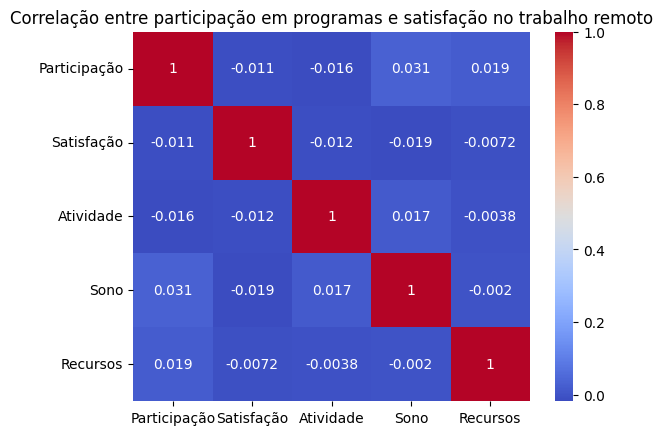

In [16]:
# Análise de correlação: usamos Spearman, pois algumas variáveis podem não ser lineares
correlation, _ = spearmanr(df_bem_estar_satisfacao_encoder[['Status_Participacao', 'Satisfacao_Trabalho_Remoto', 'Atividade_Fisica', 'Qualidade_Sono', 'Acesso_Recursos_Saude_Mental']])

# Criando heatmap para visualizar a correlação
sns.heatmap(correlation, annot=True, cmap='coolwarm', xticklabels=['Participação', 'Satisfação', 'Atividade', 'Sono', 'Recursos'], 
            yticklabels=['Participação', 'Satisfação', 'Atividade', 'Sono', 'Recursos'])
plt.title('Correlação entre participação em programas e satisfação no trabalho remoto')
plt.show()

In [17]:
# Separando dados para o modelo preditivo
X = df_bem_estar_satisfacao_encoder[['Status_Participacao', 'Atividade_Fisica', 'Qualidade_Sono', 'Acesso_Recursos_Saude_Mental']]
y = df_bem_estar_satisfacao_encoder['Satisfacao_Trabalho_Remoto']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prevendo os resultados
y_pred = model.predict(X_test)

# Calculando o erro médio quadrado
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Médio Quadrado (MSE): {mse}")

Erro Médio Quadrado (MSE): 0.6650952366067175


                        Feature  Importance
2                Qualidade_Sono    0.315937
0           Status_Participacao    0.239449
3  Acesso_Recursos_Saude_Mental    0.228128
1              Atividade_Fisica    0.216485


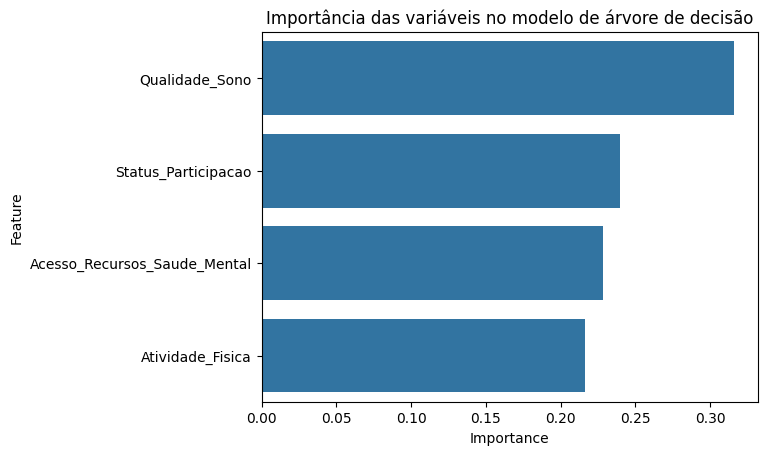

In [18]:
# Modelo de Árvore de Decisão para identificar os fatores mais importantes
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Visualizando a importância das variáveis
feature_importance = tree_model.feature_importances_
features = X.columns

# Exibindo a importância das variáveis
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Visualizando a importância das variáveis
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importância das variáveis no modelo de árvore de decisão')
plt.show()

Explicação do código:

- Correlação: A correlação entre a participação em programas de bem-estar e a satisfação no trabalho remoto é calculada usando o coeficiente de correlação de Spearman, já que as variáveis podem não ter uma relação linear. O heatmap visualiza a correlação entre as variáveis relevantes. A correlação é bem baixa.

- Modelo Preditivo: O modelo de regressão linear é usado para prever a satisfação no trabalho remoto com base em variáveis como participação em programas de bem-estar, atividade física, qualidade do sono e acesso a recursos de saúde mental. Um modelo de árvore de decisão é usado para identificar a importância relativa de cada variável no aumento da satisfação no trabalho remoto. A importância das variáveis é visualizada em um gráfico de barras.

- Resultado esperado: O heatmap de correlação ajudará a entender se existe uma correlação entre a participação em programas de bem-estar e a satisfação no trabalho remoto. O modelo de regressão linear fornecerá uma previsão da satisfação no trabalho remoto com base nas variáveis selecionadas. O gráfico de barras mostrará quais aspectos dos programas de bem-estar (como atividade física, qualidade do sono, etc.) são mais eficazes para aumentar a satisfação no trabalho remoto.

##### Utilizando dados como idade, gênero, carga de trabalho e interação social, é possível prever a probabilidade de um empregado relatar condições de saúde mental como ansiedade ou depressão?

In [25]:
df_idade_genero_trabalho = df[["Idade", "Genero", "Horas_Trabalhadas_Semana", "Avaliacao_Isolamento_Social", "Condicao_Saude_Mental"]]
df_idade_genero_trabalho.head()

,Idade,Genero,Horas_Trabalhadas_Semana,Avaliacao_Isolamento_Social,Condicao_Saude_Mental
0,32,Non-binary,47,1,Depression
1,40,Female,52,3,Anxiety
2,59,Non-binary,46,4,Anxiety
3,27,Male,32,3,Depression
4,49,Male,35,3,Anxiety


In [27]:
# 1. Pré-processamento
# Codificando variáveis categóricas

enc = LabelEncoder()
df_idade_genero_trabalho['Genero'] = enc.fit_transform(df_idade_genero_trabalho['Genero']).astype('int')
df_idade_genero_trabalho.head()

,Idade,Genero,Horas_Trabalhadas_Semana,Avaliacao_Isolamento_Social,Condicao_Saude_Mental
0,32,2,47,1,Depression
1,40,0,52,3,Anxiety
2,59,2,46,4,Anxiety
3,27,1,32,3,Depression
4,49,1,35,3,Anxiety


In [36]:
# 2. Definir variáveis independentes e dependente
X = df_idade_genero_trabalho[['Idade', 'Genero', 'Horas_Trabalhadas_Semana', 'Avaliacao_Isolamento_Social']]
y = df_idade_genero_trabalho['Condicao_Saude_Mental']

# 3. Divisão em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalização dos dados (opcional, dependendo do modelo)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Treinando o modelo (Regressão Logística)
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# 6. Previsões
y_pred = model.predict(X_test_scaled)

# 7. Avaliação do modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# 8. Previsão de probabilidade
probabilidade = model.predict_proba(X_test_scaled)  # Probabilidades de cada classe
print("Probabilidades de cada classe para a primeira amostra:")
print(probabilidade)  # Exibe as probabilidades para a primeira amostra de teste

Accuracy: 0.4296875
Classification Report:
              precision    recall  f1-score   support

     Anxiety       0.51      0.63      0.57       500
     Burnout       0.28      0.24      0.26       263
  Depression       0.33      0.23      0.27       261

    accuracy                           0.43      1024
   macro avg       0.37      0.37      0.37      1024
weighted avg       0.41      0.43      0.41      1024

Probabilidades de cada classe para a primeira amostra:
[[0.35  0.1   0.55 ]
 [0.68  0.18  0.14 ]
 [0.385 0.05  0.565]
 ...
 [0.86  0.06  0.08 ]
 [0.92  0.04  0.04 ]
 [0.35  0.24  0.41 ]]


In [35]:
df_idade_genero_trabalho["Condicao_Saude_Mental"].unique()

array(['Depression', 'Anxiety', 'Burnout'], dtype=object)

In [37]:
prob = pd.DataFrame(probabilidade, columns=['Depression', 'Anxiety', 'Burnout'])
prob

,Depression,Anxiety,Burnout
0,0.350,0.10,0.550
1,0.680,0.18,0.140
2,0.385,0.05,0.565
3,0.350,0.32,0.330
4,0.430,0.44,0.130
...,...,...,...
1019,0.730,0.07,0.200
1020,0.950,0.00,0.050
1021,0.860,0.06,0.080
1022,0.920,0.04,0.040


In [39]:
df_idade_genero_trabalho2 = pd.concat([df_idade_genero_trabalho, prob], axis=1)
df_idade_genero_trabalho2.head(10)

,Idade,Genero,Horas_Trabalhadas_Semana,Avaliacao_Isolamento_Social,Condicao_Saude_Mental,Depression,Anxiety,Burnout
0,32,2,47,1,Depression,0.350,0.100000,0.550000
1,40,0,52,3,Anxiety,0.680,0.180000,0.140000
2,59,2,46,4,Anxiety,0.385,0.050000,0.565000
3,27,1,32,3,Depression,0.350,0.320000,0.330000
4,49,1,35,3,Anxiety,0.430,0.440000,0.130000
5,59,2,39,5,Anxiety,0.740,0.110000,0.150000
6,31,3,51,5,Anxiety,0.265,0.136667,0.598333
7,42,2,54,5,Depression,0.390,0.220000,0.390000
8,56,3,24,2,Anxiety,0.770,0.135000,0.095000
9,30,0,57,2,Depression,0.410,0.420000,0.170000


##### As mudanças na carreira (promoções, mudanças de função) impactam a saúde mental dos empregados? Um modelo pode ser desenvolvido para prever mudanças na saúde mental com base na progressão de carreira?

In [43]:
df_promo_mudanca = df[["Melhoria_Observada", "Cargo_Anterior", "Novo_Cargo", "Mudanca_Salarial", "Satisfacao_Cargo", "Condicao_Saude_Mental"]]
df_promo_mudanca.head()

,Melhoria_Observada,Cargo_Anterior,Novo_Cargo,Mudanca_Salarial,Satisfacao_Cargo,Condicao_Saude_Mental
0,No,Senior Developer,Project Manager,2991.948819,2.909449,Depression
1,No,Senior Developer,Project Manager,2991.948819,2.909449,Anxiety
2,No,Senior Developer,Project Manager,2991.948819,2.909449,Anxiety
3,Yes,Senior Developer,Project Manager,2991.948819,2.909449,Depression
4,No,Junior Developer,Senior Developer,2659.000000,1.000000,Anxiety


In [44]:
# 1. Pré-processamento
# Codificando variáveis categóricas
label_encoder1 = LabelEncoder()
df_promo_mudanca['Melhoria_Observada'] = label_encoder1.fit_transform(df_promo_mudanca['Melhoria_Observada'])
print(label_encoder1.classes_)

label_encoder2 = LabelEncoder()
df_promo_mudanca['Cargo_Anterior'] = label_encoder2.fit_transform(df_promo_mudanca['Cargo_Anterior'])
print(label_encoder2.classes_)

label_encoder3 = LabelEncoder()
df_promo_mudanca['Novo_Cargo'] = label_encoder3.fit_transform(df_promo_mudanca['Novo_Cargo'])
print(label_encoder3.classes_)

df_promo_mudanca.head()

['No' 'Yes']
['Junior Developer' 'Product Manager' 'Project Manager' 'Senior Developer'
 'Team Leader']
['Junior Developer' 'Product Manager' 'Project Manager' 'Senior Developer'
 'Team Leader']


,Melhoria_Observada,Cargo_Anterior,Novo_Cargo,Mudanca_Salarial,Satisfacao_Cargo,Condicao_Saude_Mental
0,0,3,2,2991.948819,2.909449,Depression
1,0,3,2,2991.948819,2.909449,Anxiety
2,0,3,2,2991.948819,2.909449,Anxiety
3,1,3,2,2991.948819,2.909449,Depression
4,0,0,3,2659.000000,1.000000,Anxiety


In [46]:
# 2. Definir variáveis independentes e dependente
X = df_promo_mudanca[["Melhoria_Observada", "Cargo_Anterior", "Novo_Cargo", "Mudanca_Salarial", "Satisfacao_Cargo"]]
y = df_promo_mudanca['Condicao_Saude_Mental']

# 3. Divisão em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalização dos dados (opcional, dependendo do modelo)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Treinando o modelo (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 6. Previsões
y_pred = model.predict(X_test_scaled)

# 7. Avaliação do modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# 8. Importância das características
importancia_features = model.feature_importances_
print(f'Importância das características: {importancia_features}')

Accuracy: 0.484375
Classification Report:
              precision    recall  f1-score   support

     Anxiety       0.49      0.97      0.65       500
     Burnout       0.25      0.02      0.04       263
  Depression       0.43      0.02      0.04       261

    accuracy                           0.48      1024
   macro avg       0.39      0.34      0.24      1024
weighted avg       0.41      0.48      0.34      1024

Importância das características: [0.02965569 0.14647966 0.1483888  0.52678874 0.1486871 ]


#### Quais fatores contribuem mais significativamente para a sensação de isolamento social entre os funcionários que trabalham remotamente? É possível construir um modelo que identifique empregados em risco de alta isolação social?

In [53]:
df_isolamento_social = df[["Genero", "Nivel_Estresse", "Condicao_Saude_Mental", "Avaliacao_Isolamento_Social", "Satisfacao_Trabalho_Remoto", "Atividade_Fisica", "Qualidade_Sono", "Status_Participacao", "Suporte_Empresa_Trabalho_Remoto"]]
df_isolamento_social.head()

,Genero,Nivel_Estresse,Condicao_Saude_Mental,Avaliacao_Isolamento_Social,Satisfacao_Trabalho_Remoto,Atividade_Fisica,Qualidade_Sono,Status_Participacao,Suporte_Empresa_Trabalho_Remoto
0,Non-binary,Medium,Depression,1,Unsatisfied,Weekly,Good,Participou,1
1,Female,Medium,Anxiety,3,Satisfied,Weekly,Good,Participou,2
2,Non-binary,Medium,Anxiety,4,Unsatisfied,Weekly,Poor,Participou,5
3,Male,High,Depression,3,Unsatisfied,Weekly,Poor,Não Participou,3
4,Male,High,Anxiety,3,Unsatisfied,Weekly,Average,Participou,3


In [54]:
def encoder(df_aux, columns):
    for column in columns:
        le = LabelEncoder()
        df_aux[column] = le.fit_transform(df_aux[column]).astype('int')
        print(le.classes_)

    return df_aux

df_isolamento_social_encoder = encoder(df_isolamento_social, ["Genero", "Nivel_Estresse", "Condicao_Saude_Mental", "Satisfacao_Trabalho_Remoto", "Atividade_Fisica", "Qualidade_Sono", "Status_Participacao"])

['Female' 'Male' 'Non-binary' 'Prefer not to say']
['High' 'Low' 'Medium']
['Anxiety' 'Burnout' 'Depression']
['Neutral' 'Satisfied' 'Unsatisfied']
['Daily' 'Weekly']
['Average' 'Good' 'Poor']
['Não Participou' 'Participou']


In [55]:
df_isolamento_social_encoder.head()

,Genero,Nivel_Estresse,Condicao_Saude_Mental,Avaliacao_Isolamento_Social,Satisfacao_Trabalho_Remoto,Atividade_Fisica,Qualidade_Sono,Status_Participacao,Suporte_Empresa_Trabalho_Remoto
0,2,2,2,1,2,1,1,1,1
1,0,2,0,3,1,1,1,1,2
2,2,2,0,4,2,1,2,1,5
3,1,0,2,3,2,1,2,0,3
4,1,0,0,3,2,1,0,1,3


In [57]:
# 2. Variáveis independentes (X) e dependente (y)
X = df_isolamento_social_encoder[["Genero", "Nivel_Estresse", "Condicao_Saude_Mental", "Satisfacao_Trabalho_Remoto", "Atividade_Fisica", "Qualidade_Sono", "Status_Participacao", "Suporte_Empresa_Trabalho_Remoto"]]
y = df_isolamento_social_encoder['Avaliacao_Isolamento_Social']

# 3. Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalização (opcional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 6. Previsões
y_pred = model.predict(X_test_scaled)

# 7. Avaliação
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# 8. Importância das características
importancia_features = model.feature_importances_
print(f'Importância das características: {importancia_features}')

Accuracy: 0.2197265625
Classification Report:
              precision    recall  f1-score   support

           1       0.21      0.19      0.20       212
           2       0.23      0.26      0.24       195
           3       0.23      0.29      0.25       174
           4       0.16      0.15      0.16       226
           5       0.27      0.24      0.25       217

    accuracy                           0.22      1024
   macro avg       0.22      0.22      0.22      1024
weighted avg       0.22      0.22      0.22      1024

Importância das características: [0.18155772 0.12988638 0.13426764 0.12285181 0.06031567 0.10459391
 0.03246172 0.23406514]


##### Com base no feedback dos empregados e nos scores de melhoria percebidos, qual programa de bem-estar demonstra ser o mais eficaz? Pode-se criar um modelo para prever a eficácia de futuros programas de bem-estar com base nos dados históricos?

In [58]:
df.head()

,ID_Empregado,Idade,Genero,Cargo,Industria,Anos_Experiencia,Local_Trabalho,Horas_Trabalhadas_Semana,Numero_Reunioes_Virtuais,Avaliacao_Equilibrio_Vida,Nivel_Estresse,Condicao_Saude_Mental,Acesso_Recursos_Saude_Mental,Mudanca_Produtividade,Avaliacao_Isolamento_Social,Satisfacao_Trabalho_Remoto,Suporte_Empresa_Trabalho_Remoto,Atividade_Fisica,Qualidade_Sono,Regiao,Nome_Programa,Status_Participacao,Pontuacao_Feedback,Melhoria_Observada,Cargo_Anterior,Novo_Cargo,Mudanca_Salarial,Satisfacao_Cargo
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,Work-Life Balance Workshop,Participou,3,No,Senior Developer,Project Manager,2991.948819,2.909449
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,Work-Life Balance Workshop,Participou,3,No,Senior Developer,Project Manager,2991.948819,2.909449
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,Weekly,Poor,North America,Work-Life Balance Workshop,Participou,3,No,Senior Developer,Project Manager,2991.948819,2.909449
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,Weekly,Poor,Europe,Mindfulness Meditation,Não Participou,2,Yes,Senior Developer,Project Manager,2991.948819,2.909449
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,Anxiety,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,Fitness Challenge,Participou,4,No,Junior Developer,Senior Developer,2659.000000,1.000000


In [59]:
df_modelo_bem_estar = df[["Pontuacao_Feedback", "Melhoria_Observada", "Nome_Programa"]]
df_modelo_bem_estar.head()

,Pontuacao_Feedback,Melhoria_Observada,Nome_Programa
0,3,No,Work-Life Balance Workshop
1,3,No,Work-Life Balance Workshop
2,3,No,Work-Life Balance Workshop
3,2,Yes,Mindfulness Meditation
4,4,No,Fitness Challenge


In [60]:
df_modelo_bem_estar["Melhoria_Observada"] = LabelEncoder().fit_transform(df_modelo_bem_estar["Melhoria_Observada"])
df_modelo_bem_estar.head()

,Pontuacao_Feedback,Melhoria_Observada,Nome_Programa
0,3,0,Work-Life Balance Workshop
1,3,0,Work-Life Balance Workshop
2,3,0,Work-Life Balance Workshop
3,2,1,Mindfulness Meditation
4,4,0,Fitness Challenge


In [61]:
X = df_modelo_bem_estar[["Pontuacao_Feedback", "Melhoria_Observada"]]
y = df_modelo_bem_estar["Nome_Programa"]

# 3. Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalização (opcional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 6. Previsões
y_pred = model.predict(X_test_scaled)

# 7. Avaliação
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# 8. Importância das características
importancia_features = model.feature_importances_
print(f'Importância das características: {importancia_features}')

Accuracy: 0.8486328125
Classification Report:
                            precision    recall  f1-score   support

         Fitness Challenge       0.25      0.14      0.18        36
       Healthy Eating Plan       0.30      0.08      0.13        36
    Mindfulness Meditation       0.11      0.28      0.16        29
  Stress Management Course       0.21      0.22      0.22        41
Work-Life Balance Workshop       0.96      0.96      0.96       882

                  accuracy                           0.85      1024
                 macro avg       0.37      0.33      0.33      1024
              weighted avg       0.86      0.85      0.85      1024

Importância das características: [0.62732253 0.37267747]


Este modelo consegue bem prever os resultados futuros. Devido a maior quantidade de amostras em "Work-Life Balance Workshop", este programa é previsto melhor.

## Análise de Clusterização com K-means

#### Utilize o algoritmo K-means para clusterizar os empregados com base em suas características demográficas, níveis de estresse e satisfação com o trabalho remoto. Identifique e interprete os diferentes clusters para fornecer insights sobre como as condições de trabalho afetam diferentes grupos de empregados.

In [111]:
df_cluster = df[["Idade", "Genero", "Regiao", "Nivel_Estresse", "Mudanca_Salarial", "Satisfacao_Trabalho_Remoto"]]
df_cluster.head()

,Idade,Genero,Regiao,Nivel_Estresse,Mudanca_Salarial,Satisfacao_Trabalho_Remoto
0,32,Non-binary,Europe,Medium,2991.948819,Unsatisfied
1,40,Female,Asia,Medium,2991.948819,Satisfied
2,59,Non-binary,North America,Medium,2991.948819,Unsatisfied
3,27,Male,Europe,High,2991.948819,Unsatisfied
4,49,Male,North America,High,2659.000000,Unsatisfied


In [112]:
# Codificando variáveis categóricas usando pd.get_dummies (One-Hot Encoding)
df_encoded = pd.get_dummies(df_cluster, columns=['Genero', 'Regiao', 'Nivel_Estresse'], drop_first=False)

In [113]:
df_encoded.Satisfacao_Trabalho_Remoto.unique()

array(['Unsatisfied', 'Satisfied', 'Neutral'], dtype=object)

In [114]:
df_encoded['Satisfacao_Trabalho_Remoto'] = LabelEncoder().fit_transform(df_encoded["Satisfacao_Trabalho_Remoto"])

In [115]:
df_encoded.head()

,Idade,Mudanca_Salarial,Satisfacao_Trabalho_Remoto,Genero_Female,Genero_Male,Genero_Non-binary,Genero_Prefer not to say,Regiao_Africa,Regiao_Asia,Regiao_Europe,Regiao_North America,Regiao_Oceania,Regiao_South America,Nivel_Estresse_High,Nivel_Estresse_Low,Nivel_Estresse_Medium
0,32,2991.948819,2,False,False,True,False,False,False,True,False,False,False,False,False,True
1,40,2991.948819,1,True,False,False,False,False,True,False,False,False,False,False,False,True
2,59,2991.948819,2,False,False,True,False,False,False,False,True,False,False,False,False,True
3,27,2991.948819,2,False,True,False,False,False,False,True,False,False,False,True,False,False
4,49,2659.000000,2,False,True,False,False,False,False,False,True,False,False,True,False,False


In [116]:
X = df_encoded.drop(columns=['Satisfacao_Trabalho_Remoto'])
y = df_encoded["Satisfacao_Trabalho_Remoto"]

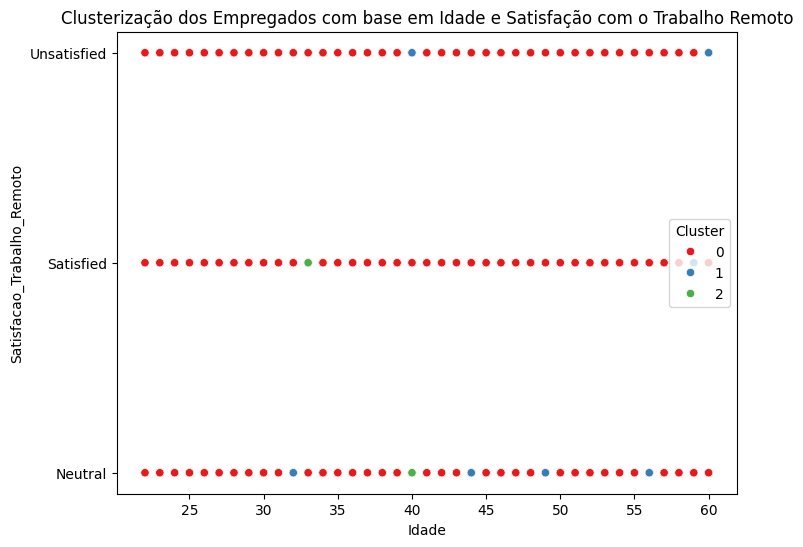

,Idade,Genero,Regiao,Nivel_Estresse,Mudanca_Salarial,Satisfacao_Trabalho_Remoto,Satisfacao_Trabalho_Remoto_Cluster,Cluster
0,32,Non-binary,Europe,Medium,2991.948819,Unsatisfied,2,0
1,40,Female,Asia,Medium,2991.948819,Satisfied,1,0
2,59,Non-binary,North America,Medium,2991.948819,Unsatisfied,2,0
3,27,Male,Europe,High,2991.948819,Unsatisfied,2,0
4,49,Male,North America,High,2659.000000,Unsatisfied,2,0
...,...,...,...,...,...,...,...,...
5113,32,Male,Asia,High,1447.000000,Neutral,0,1
5114,39,Female,Africa,Low,2991.948819,Satisfied,1,0
5115,42,Female,Oceania,High,2991.948819,Satisfied,1,0
5116,27,Female,Asia,Low,2991.948819,Unsatisfied,2,0


In [117]:
from sklearn.cluster import KMeans

# Normalizando as variáveis numéricas (Idade)
#scaler = StandardScaler()
#X['Idade'] = scaler.fit_transform(X[['Idade']])
#X['Mudanca_Salarial'] = scaler.fit_transform(X[['Mudanca_Salarial']])

df_cluster["Satisfacao_Trabalho_Remoto_Cluster"] = y

# Aplicando o K-means
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(X)

# Adicionando os resultados ao DataFrame original
df_cluster['Cluster'] = df_cluster['Cluster'].astype('category')

# Visualizando os clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Idade', y='Satisfacao_Trabalho_Remoto', hue='Cluster', data=df_cluster, palette='Set1')
plt.title('Clusterização dos Empregados com base em Idade e Satisfação com o Trabalho Remoto')
plt.show()

# Exibindo o DataFrame com clusters
display(df_cluster)